In [108]:
import pandas as pd
import numpy as np

In [109]:
real=pd.read_excel('real_GDP_rate.xlsx')

In [110]:
forecast=pd.read_excel('forecast_GDP_rate.xlsx')

We have IMF predicted GDP growth data from 1997 to 2017 for 177 countries(stored in 'forecast' variable ) and real GDP growth data(stored in 'real' variable). I clean data by excel from file "WEOhistorical.xlsx"

In [111]:
real.head()

,country,S1997ngdp_rpch,F1997ngdp_rpch,S1998ngdp_rpch,F1998ngdp_rpch,S1999ngdp_rpch,F1999ngdp_rpch,S2000ngdp_rpch,F2000ngdp_rpch,S2001ngdp_rpch,...,S2013ngdp_rpch,F2013ngdp_rpch,S2014ngdp_rpch,F2014ngdp_rpch,S2015ngdp_rpch,F2015ngdp_rpch,S2016ngdp_rpch,F2016ngdp_rpch,S2017ngdp_rpch,F2017ngdp_rpch
0,USA,3.931520,3.931520,4.306696,4.365490,4.228978,4.085428,4.148918,3.752995,0.251866,...,2.219377,1.489454,2.427755,2.370426,2.596318,2.861688,1.485139,1.567436,2.216975,2.369992
1,GBR,3.468274,3.511790,2.160676,2.640908,2.289388,2.289388,3.040152,3.082341,1.953908,...,1.664826,1.664826,2.852843,3.070484,2.194229,2.194229,1.935791,1.789289,1.822928,1.822928
2,AUT,2.520453,2.520453,2.875909,2.875909,2.822164,2.822164,2.959260,2.959239,0.669583,...,0.228030,0.321271,0.353458,0.353491,0.963062,0.963062,1.450929,1.450929,2.550900,2.550900
3,BEL,3.002397,3.002395,2.706519,2.693298,2.729984,2.729984,4.032186,4.021797,0.770417,...,0.274562,0.291108,1.348361,1.295473,1.500230,1.476308,1.465758,1.412168,1.692644,1.734553
4,DNK,3.056697,3.056697,2.686372,2.540961,2.132642,2.132644,3.023274,3.023274,1.434666,...,-0.486860,-0.486860,1.262682,1.262682,1.605213,1.605213,1.966820,1.966820,2.266060,2.266060


In [112]:
h=real["country"]==forecast["country"]

Let's remove country column, and check, if we have same countries in two variables and if they have same order.

In [113]:
l=list(h)
False in l            
        

False

In [114]:
real=real.iloc[:,1:]

In [115]:
real.head()

,S1997ngdp_rpch,F1997ngdp_rpch,S1998ngdp_rpch,F1998ngdp_rpch,S1999ngdp_rpch,F1999ngdp_rpch,S2000ngdp_rpch,F2000ngdp_rpch,S2001ngdp_rpch,F2001ngdp_rpch,...,S2013ngdp_rpch,F2013ngdp_rpch,S2014ngdp_rpch,F2014ngdp_rpch,S2015ngdp_rpch,F2015ngdp_rpch,S2016ngdp_rpch,F2016ngdp_rpch,S2017ngdp_rpch,F2017ngdp_rpch
0,3.931520,3.931520,4.306696,4.365490,4.228978,4.085428,4.148918,3.752995,0.251866,0.251866,...,2.219377,1.489454,2.427755,2.370426,2.596318,2.861688,1.485139,1.567436,2.216975,2.369992
1,3.468274,3.511790,2.160676,2.640908,2.289388,2.289388,3.040152,3.082341,1.953908,2.110264,...,1.664826,1.664826,2.852843,3.070484,2.194229,2.194229,1.935791,1.789289,1.822928,1.822928
2,2.520453,2.520453,2.875909,2.875909,2.822164,2.822164,2.959260,2.959239,0.669583,0.669551,...,0.228030,0.321271,0.353458,0.353491,0.963062,0.963062,1.450929,1.450929,2.550900,2.550900
3,3.002397,3.002395,2.706519,2.693298,2.729984,2.729984,4.032186,4.021797,0.770417,0.799768,...,0.274562,0.291108,1.348361,1.295473,1.500230,1.476308,1.465758,1.412168,1.692644,1.734553
4,3.056697,3.056697,2.686372,2.540961,2.132642,2.132644,3.023274,3.023274,1.434666,1.427773,...,-0.486860,-0.486860,1.262682,1.262682,1.605213,1.605213,1.966820,1.966820,2.266060,2.266060


In [116]:
forecast=forecast.iloc[:,1:]

In [117]:
forecast.head()

,S1997ngdp_rpch,F1997ngdp_rpch,S1998ngdp_rpch,F1998ngdp_rpch,S1999ngdp_rpch,F1999ngdp_rpch,S2000ngdp_rpch,F2000ngdp_rpch,S2001ngdp_rpch,F2001ngdp_rpch,...,S2013ngdp_rpch,F2013ngdp_rpch,S2014ngdp_rpch,F2014ngdp_rpch,S2015ngdp_rpch,F2015ngdp_rpch,S2016ngdp_rpch,F2016ngdp_rpch,S2017ngdp_rpch,F2017ngdp_rpch
0,2.20,2.35,2.22,2.58,2.17,2.03,2.16,2.60,2.98,3.16,...,2.37,2.12,2.95,2.59,2.95,3.09,3.06,2.84,2.50,2.20
1,2.70,2.97,2.81,2.61,2.12,1.19,2.11,2.38,2.00,2.81,...,2.03,1.12,1.54,1.87,2.46,2.71,2.33,2.23,2.22,1.05
2,1.42,0.98,2.75,2.70,2.74,2.61,2.52,2.52,3.28,2.91,...,1.83,1.06,1.65,1.64,1.75,1.86,1.56,1.59,1.38,1.18
3,2.50,2.42,2.23,2.60,2.77,2.59,2.22,2.49,2.87,3.01,...,0.83,0.34,1.23,1.04,1.21,1.40,1.50,1.45,1.39,1.37
4,2.19,2.47,2.48,2.67,2.67,1.91,2.00,1.52,2.10,2.09,...,1.18,1.23,1.34,1.23,1.67,1.80,2.01,1.96,1.79,1.45


Let's stored every predicted values in variable 'pred' and real 'values' in re

In [118]:
pred=[]
for i in range(real.shape[0]):
    a=list(forecast.iloc[i])
    pred+=a

In [119]:
forecast.shape


(177, 42)

In [120]:
len(pred)

7434

In [121]:
177*42


7434

In [122]:
re=[]
for i in range(real.shape[0]):
    b=list(real.iloc[i])
    re+=b

In [123]:
real.shape

(177, 42)

In [124]:
len(re)

7434

If predicted or real values are greater or equal than 0 let's call tham "increase", else "decrease" and store them in "p" and "r"

In [125]:
p=np.array([])
for i in pred:
    if i>=0:
        t="increase"
    else:
        t='decrease '
    p=np.append(p,t)

In [126]:
r=np.array([])
for j in re:
    if j>=0:
        g="increase"
    else:
        g='decrease '
    r=np.append(r,g)

In [127]:
len(r)

7434

Let's plot confusion matrix and calculate same accuray scores

In [128]:
import matplotlib.pyplot as plt

In [129]:
from mlxtend.plotting import plot_confusion_matrix

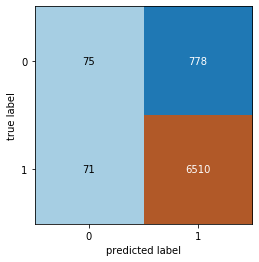

In [130]:
plot_confusion_matrix(conf_mat=c,cmap="Paired")
plt.show()                     


In [131]:
from sklearn.metrics import confusion_matrix 
c=confusion_matrix(y_true =r, y_pred = p)

In [132]:
TP=6510
FN=71
TN=75
FP=778

In [133]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print(Accuracy)

0.8857949959644875


In [134]:
Recall = TP / (TP + FN)
print(Recall)

0.9892113660537912


In [135]:
Precision = TP / (TP + FP)
print(Precision)

0.8932491767288694


In [136]:
F_score = (2*Recall*Precision)/(Recall+Precision)
print(F_score)

0.9387843391736967


In [137]:
Specificity = TN / (TN + FP)
print(Specificity)

0.08792497069167643


In [138]:
from sklearn.metrics import cohen_kappa_score

In [139]:
cohen_kappa_score(r,p)

0.12065833599210873